# 參數優化 - 將歷史報酬提升數倍的方式！

這個單元中，我們首先要來撰寫一個獲利的策略

寫一個策略，首先要來將我們之前爬到的數據拿出來

## 拿出歷史大盤數據

In [1]:
from finlab.data import Data

data = Data()
twii = data.get('發行量加權股價指數')
twii = twii[(twii.index.second == 0)]['台股指數']

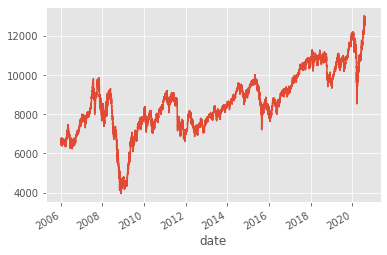

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

twii.plot()

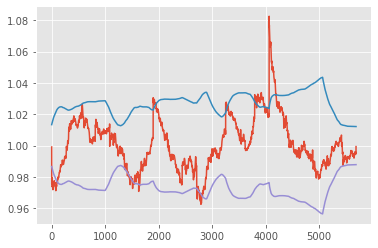

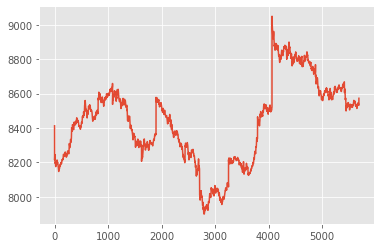

In [3]:
sma = twii.rolling(500).mean()
bias = twii / sma
ub =1+ bias.rolling(1000).std() * 2
lb = 1 - bias.rolling(1000).std() * 2

import matplotlib.pyplot as plt

plt.plot(bias['2008-03'].values)
plt.plot(ub['2008-03'].values)
plt.plot(lb['2008-03'].values)
plt.show()
plt.plot(twii['2008-03'].values)

## 乖離率策略

4600.260000000005

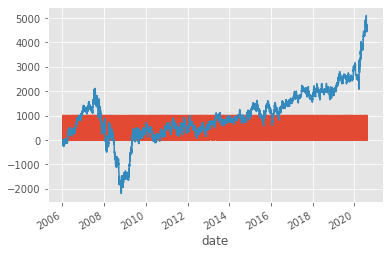

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

def strategy(m1=500, m2=1000, m3=1, m4=1, draw_plot=False):
    
    
    sma = twii.rolling(m1).mean()

    bias = (twii / sma)
    ub = 1 + bias.rolling(m2).std() * m3
    lb = 1 - bias.rolling(m2).std() * m4
    
    buy = (bias < lb) 
    sell = (bias > ub)

    hold = pd.Series(np.nan, index=sell.index)
    hold[buy] = 0
    hold[sell] = 1
    hold = hold.ffill()

    returns = twii.shift(-2) - twii.shift(-1)
    
    
    
    returns[hold == 0] = 0
    returns -= hold.diff().abs() * 3

    creturn = returns.cumsum()
    
    
    
    if draw_plot:
        (hold*1000).plot()
        creturn.plot()
    
     
    return creturn.dropna()[-1]

    
strategy(draw_plot=True)

## 乖離率優化

In [5]:
vmax = 0
for m1 in range(500, 2000, 200):
    for m2 in range(400, 800, 20):
        v = strategy(m1, m2, 1, 1)
        if v > vmax:
            vmax = v
            print(vmax, m1, m2, 1, 1)

3386.269999999986 500 400 1 1
3542.5299999999897 500 420 1 1
3604.7099999999864 500 440 1 1
3807.5299999999934 500 460 1 1
3813.989999999999 500 480 1 1
4188.740000000006 500 500 1 1
4573.210000000005 500 560 1 1
5328.76000000002 500 600 1 1
5464.540000000009 500 640 1 1
5532.350000000004 500 740 1 1
5621.209999999996 500 760 1 1
7616.619999999979 700 400 1 1
7831.379999999992 700 420 1 1
7897.590000000006 700 440 1 1
8746.210000000008 700 460 1 1
8832.850000000002 1300 400 1 1
8925.520000000006 1300 420 1 1
8969.160000000002 1700 620 1 1


## 繪製出歷史報酬

7335.099999999986

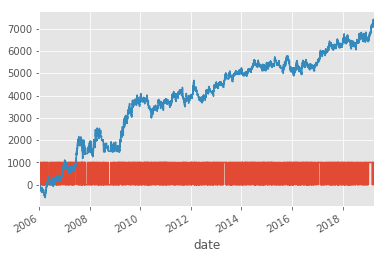

In [10]:
strategy(1300, 780, 1, 1, draw_plot=True)